# Project: Investigate a Dataset (FBI Gun Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

This dataset contains the number of FBI firearm background checks initiated through the FBI's National Instant Criminal Background Check System (NICS).The NICS data is used to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

Sources:
https://www.fbi.gov/services/cjis/nics
https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md

For this analysis, I will explore the dataset to ask the following questions:


What is the overall trend of gun purchases?

What states have the highest volume of gun registrations?

What states have the highest growth of gun registrations overtime?

What states have the highest gun registrations per capita?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib  inline 

<a id='wrangling'></a>
## Data Wrangling

> In this section, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis. 


### General Properties

The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.
The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.

In [2]:
df_guns = pd.read_excel('gun-data.xlsx')

df_us_census = pd.read_csv('U.S. Census Data.csv', sep =',')

#### FBI Guns Data

Perform operations to inspect data for any potential issues

In [3]:
df_guns.head(5) 

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
df_guns.info()  # this displays a concise summary of the dataframe,
                # including the shape of the df, data types and number of non-null values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [5]:
df_guns.isnull().sum()  # check for missing value count for each column

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [6]:
df_guns.describe() # check summary statistics 

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


#### Census Data

In [7]:
df_us_census.head(5) 

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [8]:
df_us_census.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [9]:
print(df_us_census.duplicated().sum()) # check for duplicates

3



### Data Cleaning  

##### FBI Guns Data

After assessing the guns data, I'm going to convert month to datetime.

In [10]:
#timestamps are represented as strings instead of datetime 
df_guns['month'] = pd.to_datetime(df_guns.month, format= "%Y-%m")

df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

In [11]:
# make state lowercase for readability 
df_guns["state"] = df_guns["state"].str.lower() 

The number of unique values in the state column shows several states/territories that are inconsistent with the US Census data.

In [12]:
df_guns['state'].unique()  # Guam ,Mariana Islands, Puerto Rico, Virgin Islands, District of Columbia aren't in the census data

array(['alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'colorado', 'connecticut', 'delaware', 'district of columbia',
       'florida', 'georgia', 'guam', 'hawaii', 'idaho', 'illinois',
       'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maine',
       'mariana islands', 'maryland', 'massachusetts', 'michigan',
       'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska',
       'nevada', 'new hampshire', 'new jersey', 'new mexico', 'new york',
       'north carolina', 'north dakota', 'ohio', 'oklahoma', 'oregon',
       'pennsylvania', 'puerto rico', 'rhode island', 'south carolina',
       'south dakota', 'tennessee', 'texas', 'utah', 'vermont',
       'virgin islands', 'virginia', 'washington', 'west virginia',
       'wisconsin', 'wyoming'], dtype=object)

I'm going to filter and drop the states/territories that are missing from the US Census Data.

In [13]:
df_guns.drop = df_guns.query('state != "Guam"',inplace=True)
df_guns.drop = df_guns.query('state != "Mariana Islands"',inplace=True)
df_guns.drop = df_guns.query('state != "Puerto Rico"', inplace=True)
df_guns.drop = df_guns.query('state != "Virgin Islands"',inplace=True)
df_guns.drop = df_guns.query('state != "District of Columbia"',inplace=True)

df_guns['state'].unique()

array(['alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'colorado', 'connecticut', 'delaware', 'district of columbia',
       'florida', 'georgia', 'guam', 'hawaii', 'idaho', 'illinois',
       'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maine',
       'mariana islands', 'maryland', 'massachusetts', 'michigan',
       'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska',
       'nevada', 'new hampshire', 'new jersey', 'new mexico', 'new york',
       'north carolina', 'north dakota', 'ohio', 'oklahoma', 'oregon',
       'pennsylvania', 'puerto rico', 'rhode island', 'south carolina',
       'south dakota', 'tennessee', 'texas', 'utah', 'vermont',
       'virgin islands', 'virginia', 'washington', 'west virginia',
       'wisconsin', 'wyoming'], dtype=object)

https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset

I wanted to see the percentage of missing data in the guns dataset for every column

In [14]:
percent_missing = df_guns.isnull().sum() * 100 / len(df_guns)
missing_values = pd.DataFrame({'column_name': df_guns.columns,
                                 'percent_missing': percent_missing})

missing_values

,column_name,percent_missing
month,month,0.000000
state,state,0.000000
permit,permit,0.192231
permit_recheck,permit_recheck,91.189427
handgun,handgun,0.160192
long_gun,long_gun,0.152183
other,other,55.947137
multiple,multiple,0.000000
admin,admin,0.184221
prepawn_handgun,prepawn_handgun,15.562675


In [15]:
# df_guns.fillna(mean,inplace=True) #do i need to fill in nulls ?

In [16]:
df_guns.info() # confirm correction with info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

https://stackoverflow.com/questions/45985877/slicing-multiple-column-ranges-from-a-dataframe-using-iloc

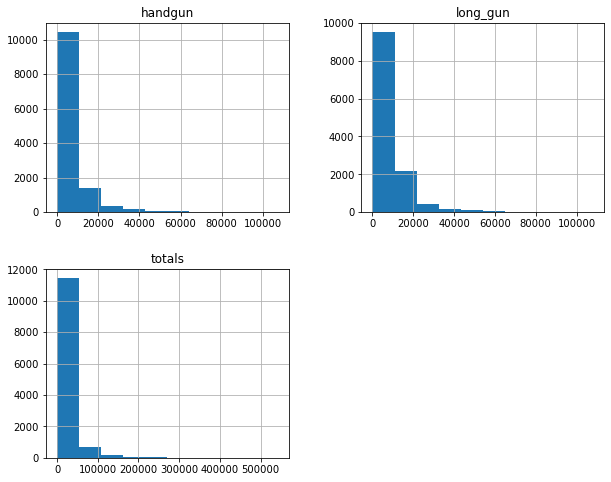

In [17]:
# display a histogram of - handgun, long_gun, and totals - all seem to be skewed to the right 

df_guns.iloc[:,np.r_[4:6,26]].hist(figsize=(10,8));

##### Data Cleaning: Census Data

In order to join the US Census data with the FBI Guns data, I need to swap the rows for columns.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html

https://knowledge.udacity.com/questions/428050

In [18]:
df_us_census.T 

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_us_census['Fact'].unique()  # check unique rows 

array(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

In [20]:
df_us_census['Fact Note'].unique() 

array([nan, '(a)', '(b)', '(c)',
       'Includes data not distributed by county.',
       'Includes persons reporting only one race',
       'Hispanics may be of any race, so also are included in applicable race categories',
       'Economic Census - Puerto Rico data are not comparable to U.S. Economic Census data',
       'Either no or too few sample observations were available to compute an estimate, or a ratio of medians cannot be calculated because one or both of the median estimates falls in the lowest or upper interval of an open ended distribution.',
       'Suppressed to avoid disclosure of confidential information',
       'Fewer than 25 firms', 'Footnote on this item in place of data',
       'Not available', 'Suppressed; does not meet publication standards',
       'Not applicable',
       'Value greater than zero but less than half unit of measure shown'],
      dtype=object)

I'm going to create a new df and drop columns I don't need for this analysis

In [21]:
df_us_census_2 = df_us_census.T
df_us_census_2.columns = df_us_census_2.loc['Fact']
df_us_census_2.drop(['Fact','Fact Note'],inplace=True)

df_us_census_2.head(5)

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
print(df_us_census_2.duplicated().sum())

0


I'm going to replace commas and missing spaces with underscores

In [23]:
df_us_census_2.columns = [str(x).lower().replace(',','_').replace(' ','_') for x in df_us_census_2.columns]

df_us_census_2

,population_estimates__july_1__2016___(v2016),population_estimates_base__april_1__2010___(v2016),population__percent_change_-_april_1__2010_(estimates_base)_to_july_1__2016___(v2016),population__census__april_1__2010,persons_under_5_years__percent__july_1__2016___(v2016),persons_under_5_years__percent__april_1__2010,persons_under_18_years__percent__july_1__2016___(v2016),persons_under_18_years__percent__april_1__2010,persons_65_years_and_over__percent___july_1__2016___(v2016),persons_65_years_and_over__percent__april_1__2010,...,nan,value_flags,-,d,f,fn,nan,s,x,z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,17.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Georgia,"10,310,371","9,688,680",6.40%,"9,687,653",6.40%,7.10%,24.40%,25.70%,13.10%,10.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


https://knowledge.udacity.com/questions/428050

In [24]:
df_us_census_2.info() # check index to drop columns

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 85 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   population_estimates__july_1__2016___(v2016)                                            50 non-null     object
 1   population_estimates_base__april_1__2010___(v2016)                                      50 non-null     object
 2   population__percent_change_-_april_1__2010_(estimates_base)_to_july_1__2016___(v2016)   50 non-null     object
 3   population__census__april_1__2010                                                       50 non-null     object
 4   persons_under_5_years__percent__july_1__2016___(v2016)                                  50 non-null     object
 5   persons_under_5_years__percent__april_1__2010                             

Remove all columns between column index 3 to 86 since we're only going to look at 2016 and 2010 census population data

In [25]:
df_us_census_2.drop(df_us_census_2.iloc[:, 2:86], inplace = True, axis = 1)


df_us_census_2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 2 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   population_estimates__july_1__2016___(v2016)        50 non-null     object
 1   population_estimates_base__april_1__2010___(v2016)  50 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


https://github.com/malaklm/solution/blob/master/US%20Census%20data.ipynb

Replace commas in dataset to convert to floats 

In [26]:
df_us_census_2.replace({",": ''}, regex=True,inplace=True)
df_us_census_2.head()

,population_estimates__july_1__2016___(v2016),population_estimates_base__april_1__2010___(v2016)
Alabama,4863300,4780131
Alaska,741894,710249
Arizona,6931071,6392301
Arkansas,2988248,2916025
California,39250017,37254522


Convert strings to floats in order to perform calculations

In [27]:
 
df_us_census_2['population_estimates__july_1__2016___(v2016)'] = pd.to_numeric(df_us_census_2['population_estimates__july_1__2016___(v2016)'],errors= 'coerce',downcast='float')
df_us_census_2['population_estimates_base__april_1__2010___(v2016)'] = pd.to_numeric(df_us_census_2['population_estimates_base__april_1__2010___(v2016)'],errors= 'coerce',downcast='float')

df_us_census_2.dtypes # check if data type conversion worked

population_estimates__july_1__2016___(v2016)          float32
population_estimates_base__april_1__2010___(v2016)    float32
dtype: object

In [28]:
df_us_census.head(20)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

What is the overall trend of gun purchases?

What state has the highest growth in gun registrations?


What state has the highest guns per capita?


### Research Question 1: What is the overall trend of gun purchases?

https://seaborn.pydata.org/examples/timeseries_facets.html

https://stackoverflow.com/questions/65300109/generating-a-line-graph-using-seaborn-or-matplotlib-with-year-as-hue-month-as

In [29]:
df_guns_q1 = df_guns #making a new df to answer question one 

In [30]:
df_guns_q1 = df_guns_q1.reset_index(drop=True)

In [31]:
# drop columns with high volume of nulls and for analysis
df_guns_q1.drop(['permit','permit_recheck','other','admin','prepawn_handgun','prepawn_long_gun','prepawn_other','redemption_other', 'redemption_handgun','redemption_long_gun','returned_other','rentals_handgun','rentals_long_gun','private_sale_handgun','private_sale_long_gun','private_sale_other','return_to_seller_handgun','return_to_seller_long_gun','return_to_seller_other','returned_handgun','returned_long_gun'], axis=1, inplace=True)

df_guns_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     12485 non-null  datetime64[ns]
 1   state     12485 non-null  object        
 2   handgun   12465 non-null  float64       
 3   long_gun  12466 non-null  float64       
 4   multiple  12485 non-null  int64         
 5   totals    12485 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 585.4+ KB


In [32]:
# df_guns_q1.describe().state

In [33]:
new = df_guns_q1.groupby(['month'],as_index=False).sum().sort_values(by='totals', ascending=False)
new

,month,handgun,long_gun,multiple,totals
205,2015-12-01,1201747.0,873335.0,34059,3308199
169,2012-12-01,876673.0,1224465.0,38438,2776105
217,2016-12-01,844966.0,795473.0,23543,2763115
207,2016-02-01,848215.0,468229.0,28741,2604667
216,2016-11-01,748430.0,745659.0,25369,2554486
...,...,...,...,...,...
18,2000-05-01,161115.0,249427.0,8058,526521
56,2003-07-01,130002.0,235195.0,6855,525032
55,2003-06-01,131164.0,230756.0,6629,523780
43,2002-06-01,130645.0,230211.0,6400,507222


In [34]:
df_guns_q1['year'] = df_guns_q1['month'].dt.year

totals = df_guns_q1.pivot("month", "state", "totals")
totals.head()

state,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,district of columbia,florida,...,tennessee,texas,utah,vermont,virgin islands,virginia,washington,west virginia,wisconsin,wyoming
month,,,,,,,,,,,,,,,,,,,,,
1998-11-01,1062,145,379,589,2101,622,80,55,0,812,...,107,2794,267,59,0,24,361,408,241,107
1998-12-01,35506,3840,17074,21163,65344,23176,6790,2080,0,31529,...,24666,79605,10415,2057,0,25170,11641,13786,15201,3379
1999-01-01,18049,2278,12859,11953,56953,19503,6265,1128,1,18999,...,18473,50992,5055,1043,0,14009,8695,8260,7780,2180
1999-02-01,20583,2413,14546,15348,57471,22239,8069,1077,3,22252,...,23304,55148,5933,1668,0,16053,9383,11206,10578,2643
1999-03-01,19424,3206,14992,13720,68327,17287,7877,1314,2,23492,...,23035,54096,6021,1941,0,17193,10551,10867,14891,2776


Text(0.5, 1.0, 'Overall Trend of Gun Permits')

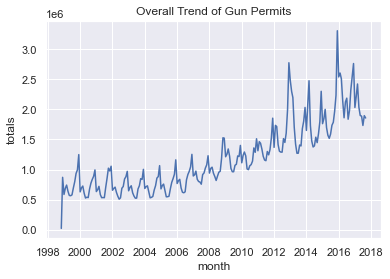

In [35]:
sns.set_theme(style="darkgrid")


guns_overtime = df_guns_q1.groupby(['month'])['totals'].sum()


overtime_fig=sns.lineplot(data=guns_overtime, palette="crest")
overtime_fig.set_title('Overall Trend of Gun Permits')

https://stackoverflow.com/questions/40273251/pandas-groupby-multiple-columns-with-pct-change

In [36]:
#pct change

# df_guns_q1['Pct_Change'] = df_guns_q1.groupby(['month','state'])['totals'].pct_change()
# df_guns_q1['Pct_Change'] 
# df_guns_q1['Pct_Change'] = df_guns_q1.groupby(['month','state'])['totals'].pct_change()

# df_guns_q1['Pct_Change'] 
# df_guns_pct_change = df_guns_q1.set_index(['month', 'totals', 'state']) #.unstack(['totals', 'state'])
# df_guns_pct_change

# df_guns_pct_change.pct_change()

### Research Question 2: What state has the highest volume of gun registrations?

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

In [37]:
df_guns_q1_totals = df_guns_q1.groupby(['state'],as_index=False).sum().sort_values(by='totals', ascending=False).head(5)
df_guns_q1_totals

,state,handgun,long_gun,multiple,totals,year
18,kentucky,1753246.0,2239863.0,110439,29762434,455769
46,texas,6493832.0,7651396.0,367962,19435186,455769
4,california,5910880.0,5936770.0,207864,19014063,455769
14,illinois,2434983.0,2289041.0,107550,15471534,455769
40,pennsylvania,2166025.0,9383642.0,59386,13133876,455769


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

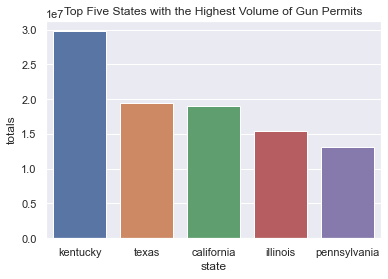

In [60]:
ax = sns.barplot(x ="state", y="totals", data=df_guns_q1_totals).set_title(
    'Top Five States with the Highest Volume of Gun Permits')

### Research Question 3: What state had the highest per capita gun registrations in 2010?

In [39]:
#Get all the 2010 data
guns_2010 = df_guns[df_guns.month == '2010']

guns_2010.head()



,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
5060,2010-01-01,alabama,397.0,NaN,9404.0,10081.0,153.0,517,2.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24397
5061,2010-01-01,alaska,0.0,NaN,1532.0,1812.0,67.0,110,0.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3821
5062,2010-01-01,arizona,2211.0,NaN,6479.0,5178.0,201.0,284,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15687
5063,2010-01-01,arkansas,1841.0,NaN,3783.0,5039.0,55.0,272,1.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13506
5064,2010-01-01,california,24653.0,NaN,18280.0,20059.0,0.0,0,56.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63048


In [40]:
guns_2010.set_index('state',inplace=True,drop=True)
guns_2010

,month,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,,,,,,,,,,,,,,,,,,,,,
alabama,2010-01-01,397.0,NaN,9404.0,10081.0,153.0,517,2.0,10.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24397
alaska,2010-01-01,0.0,NaN,1532.0,1812.0,67.0,110,0.0,8.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3821
arizona,2010-01-01,2211.0,NaN,6479.0,5178.0,201.0,284,0.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15687
arkansas,2010-01-01,1841.0,NaN,3783.0,5039.0,55.0,272,1.0,13.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13506
california,2010-01-01,24653.0,NaN,18280.0,20059.0,0.0,0,56.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63048
colorado,2010-01-01,0.0,NaN,10471.0,10141.0,0.0,3653,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24265
connecticut,2010-01-01,7855.0,NaN,4147.0,3316.0,20.0,0,8.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15346
delaware,2010-01-01,0.0,NaN,785.0,792.0,12.0,49,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1638
district of columbia,2010-01-01,0.0,NaN,20.0,1.0,0.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21


In [41]:
df_us_census_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 2 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   population_estimates__july_1__2016___(v2016)        50 non-null     float32
 1   population_estimates_base__april_1__2010___(v2016)  50 non-null     float32
dtypes: float32(2)
memory usage: 800.0+ bytes


In [42]:
# join the census and gun data

df_us_census_2010 = df_us_census_2['population_estimates_base__april_1__2010___(v2016)']
df_us_census_2010.to_frame().head()


,population_estimates_base__april_1__2010___(v2016)
Alabama,4780131.0
Alaska,710249.0
Arizona,6392301.0
Arkansas,2916025.0
California,37254520.0


In [43]:
guns_2010.index = [x.title() for x in guns_2010.index]

guns_2010.head()

,month,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
Alabama,2010-01-01,397.0,NaN,9404.0,10081.0,153.0,517,2.0,10.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24397
Alaska,2010-01-01,0.0,NaN,1532.0,1812.0,67.0,110,0.0,8.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3821
Arizona,2010-01-01,2211.0,NaN,6479.0,5178.0,201.0,284,0.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15687
Arkansas,2010-01-01,1841.0,NaN,3783.0,5039.0,55.0,272,1.0,13.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13506
California,2010-01-01,24653.0,NaN,18280.0,20059.0,0.0,0,56.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63048


In [44]:
df_us_census_2010.to_frame().join(guns_2010)

,population_estimates_base__april_1__2010___(v2016),month,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
Alabama,4780131.0,2010-01-01,397.0,NaN,9404.0,10081.0,153.0,517,2.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24397
Alaska,710249.0,2010-01-01,0.0,NaN,1532.0,1812.0,67.0,110,0.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3821
Arizona,6392301.0,2010-01-01,2211.0,NaN,6479.0,5178.0,201.0,284,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15687
Arkansas,2916025.0,2010-01-01,1841.0,NaN,3783.0,5039.0,55.0,272,1.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13506
California,37254520.0,2010-01-01,24653.0,NaN,18280.0,20059.0,0.0,0,56.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63048
Colorado,5029324.0,2010-01-01,0.0,NaN,10471.0,10141.0,0.0,3653,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24265
Connecticut,3574114.0,2010-01-01,7855.0,NaN,4147.0,3316.0,20.0,0,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15346
Delaware,897936.0,2010-01-01,0.0,NaN,785.0,792.0,12.0,49,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1638
Florida,18804592.0,2010-01-01,0.0,NaN,27038.0,15924.0,0.0,1303,405.0,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46404
Georgia,9688680.0,2010-01-01,9881.0,NaN,8603.0,7074.0,123.0,403,0.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29217


In [45]:
df_us_census_2010 = df_us_census_2010.to_frame().join(guns_2010)

df_us_census_2010.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 27 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   population_estimates_base__april_1__2010___(v2016)  50 non-null     float32       
 1   month                                               50 non-null     datetime64[ns]
 2   permit                                              50 non-null     float64       
 3   permit_recheck                                      0 non-null      float64       
 4   handgun                                             50 non-null     float64       
 5   long_gun                                            50 non-null     float64       
 6   other                                               50 non-null     float64       
 7   multiple                                            50 non-null     int64         
 8   admin 

In [46]:
# per cap 
percapita_2010 = df_us_census_2010['totals']/df_us_census_2010['population_estimates_base__april_1__2010___(v2016)']

percapita_2010.sort_values(ascending=False).head(10)

Kentucky         0.046528
Utah             0.015268
Montana          0.006843
West Virginia    0.006310
Wyoming          0.005793
Alaska           0.005380
Alabama          0.005104
South Dakota     0.004924
Colorado         0.004825
New Hampshire    0.004750
dtype: float64

In [47]:
#     'Per Capita Gun Permits by State')percapita_2010['state'] = percapita_2010.index

# census_plot_2010 = sns.barplot(x data=percapita_2010).set_title(
#     'Per Capita Gun Permits by State')
# percapita_2010['state'] = percapita_2010.index
# percapita_2010


# percapita_2010['totals'] = percapita_2010.index
# percapita_2010

# census_plot_2010 = sns.barplot(x="state", y="totals",data=percapita_2010)
#percapita_2010.plot(x='state', y='totals', kind='bar');

### Research Question 3: What state had the highest per capita gun registrations in 2016?

In [48]:
#Get all the 2016 data
guns_2016 = df_guns[df_guns.month == '2016']

guns_2016.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
1100,2016-01-01,alabama,27242.0,NaN,25445.0,14785.0,1266.0,884,0.0,8.0,...,0.0,NaN,NaN,16.0,15.0,2.0,0.0,1.0,0.0,73218
1101,2016-01-01,alaska,192.0,NaN,2859.0,2245.0,300.0,164,0.0,5.0,...,0.0,NaN,NaN,2.0,0.0,0.0,0.0,1.0,0.0,6085
1102,2016-01-01,arizona,3898.0,NaN,15745.0,8512.0,1107.0,575,0.0,7.0,...,0.0,NaN,NaN,10.0,9.0,2.0,4.0,2.0,0.0,31910
1103,2016-01-01,arkansas,3670.0,NaN,7954.0,5982.0,305.0,340,0.0,11.0,...,0.0,NaN,NaN,3.0,6.0,1.0,1.0,0.0,0.0,20437
1104,2016-01-01,california,127715.0,NaN,52139.0,32970.0,7054.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,220912


In [49]:
guns_2016.set_index('state',inplace=True,drop=True)
guns_2016

,month,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,,,,,,,,,,,,,,,,,,,,,
alabama,2016-01-01,27242.0,NaN,25445.0,14785.0,1266.0,884,0.0,8.0,17.0,...,0.0,NaN,NaN,16.0,15.0,2.0,0.0,1.0,0.0,73218
alaska,2016-01-01,192.0,NaN,2859.0,2245.0,300.0,164,0.0,5.0,3.0,...,0.0,NaN,NaN,2.0,0.0,0.0,0.0,1.0,0.0,6085
arizona,2016-01-01,3898.0,NaN,15745.0,8512.0,1107.0,575,0.0,7.0,4.0,...,0.0,NaN,NaN,10.0,9.0,2.0,4.0,2.0,0.0,31910
arkansas,2016-01-01,3670.0,NaN,7954.0,5982.0,305.0,340,0.0,11.0,5.0,...,0.0,NaN,NaN,3.0,6.0,1.0,1.0,0.0,0.0,20437
california,2016-01-01,127715.0,NaN,52139.0,32970.0,7054.0,0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,220912
colorado,2016-01-01,8431.0,NaN,23518.0,13327.0,1474.0,1236,0.0,0.0,0.0,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,48214
connecticut,2016-01-01,14005.0,NaN,13096.0,4366.0,236.0,0,9.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,31712
delaware,2016-01-01,395.0,NaN,2548.0,1608.0,110.0,73,0.0,5.0,0.0,...,0.0,NaN,NaN,89.0,23.0,5.0,3.0,1.0,0.0,4886
district of columbia,2016-01-01,27.0,NaN,52.0,3.0,0.0,0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,82


In [50]:
# join the census and gun data

df_us_census_2016 = df_us_census_2['population_estimates__july_1__2016___(v2016)']
df_us_census_2016.to_frame().head()


,population_estimates__july_1__2016___(v2016)
Alabama,4863300.0
Alaska,741894.0
Arizona,6931071.0
Arkansas,2988248.0
California,39250016.0


https://knowledge.udacity.com/questions/574175

In [51]:
guns_2016.index = [x.title() for x in guns_2016.index]

guns_2016.head()

,month,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
Alabama,2016-01-01,27242.0,NaN,25445.0,14785.0,1266.0,884,0.0,8.0,17.0,...,0.0,NaN,NaN,16.0,15.0,2.0,0.0,1.0,0.0,73218
Alaska,2016-01-01,192.0,NaN,2859.0,2245.0,300.0,164,0.0,5.0,3.0,...,0.0,NaN,NaN,2.0,0.0,0.0,0.0,1.0,0.0,6085
Arizona,2016-01-01,3898.0,NaN,15745.0,8512.0,1107.0,575,0.0,7.0,4.0,...,0.0,NaN,NaN,10.0,9.0,2.0,4.0,2.0,0.0,31910
Arkansas,2016-01-01,3670.0,NaN,7954.0,5982.0,305.0,340,0.0,11.0,5.0,...,0.0,NaN,NaN,3.0,6.0,1.0,1.0,0.0,0.0,20437
California,2016-01-01,127715.0,NaN,52139.0,32970.0,7054.0,0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,220912


In [52]:
df_us_census_2016.to_frame().join(guns_2016)

,population_estimates__july_1__2016___(v2016),month,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
Alabama,4863300.0,2016-01-01,27242.0,NaN,25445.0,14785.0,1266.0,884,0.0,8.0,...,0.0,NaN,NaN,16.0,15.0,2.0,0.0,1.0,0.0,73218
Alaska,741894.0,2016-01-01,192.0,NaN,2859.0,2245.0,300.0,164,0.0,5.0,...,0.0,NaN,NaN,2.0,0.0,0.0,0.0,1.0,0.0,6085
Arizona,6931071.0,2016-01-01,3898.0,NaN,15745.0,8512.0,1107.0,575,0.0,7.0,...,0.0,NaN,NaN,10.0,9.0,2.0,4.0,2.0,0.0,31910
Arkansas,2988248.0,2016-01-01,3670.0,NaN,7954.0,5982.0,305.0,340,0.0,11.0,...,0.0,NaN,NaN,3.0,6.0,1.0,1.0,0.0,0.0,20437
California,39250016.0,2016-01-01,127715.0,NaN,52139.0,32970.0,7054.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,220912
Colorado,5540545.0,2016-01-01,8431.0,NaN,23518.0,13327.0,1474.0,1236,0.0,0.0,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,48214
Connecticut,3576452.0,2016-01-01,14005.0,NaN,13096.0,4366.0,236.0,0,9.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,31712
Delaware,952065.0,2016-01-01,395.0,NaN,2548.0,1608.0,110.0,73,0.0,5.0,...,0.0,NaN,NaN,89.0,23.0,5.0,3.0,1.0,0.0,4886
Florida,20612440.0,2016-01-01,28458.0,NaN,62085.0,26356.0,3480.0,2036,36.0,13.0,...,0.0,NaN,NaN,42.0,15.0,0.0,0.0,0.0,0.0,125935
Georgia,10310371.0,2016-01-01,30513.0,NaN,18236.0,9696.0,654.0,564,0.0,14.0,...,0.0,NaN,NaN,6.0,4.0,1.0,0.0,0.0,0.0,62707


In [53]:
df_us_census_2016 = df_us_census_2016.to_frame().join(guns_2016)

df_us_census_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   population_estimates__july_1__2016___(v2016)  50 non-null     float32       
 1   month                                         50 non-null     datetime64[ns]
 2   permit                                        50 non-null     float64       
 3   permit_recheck                                0 non-null      float64       
 4   handgun                                       50 non-null     float64       
 5   long_gun                                      50 non-null     float64       
 6   other                                         50 non-null     float64       
 7   multiple                                      50 non-null     int64         
 8   admin                                         50 non-null     floa

In [54]:
# per cap 
percapita_2016 = df_us_census_2016['totals']/df_us_census_2016['population_estimates__july_1__2016___(v2016)']

percapita_2016.sort_values(ascending=False).head(10)

Kentucky         0.068151
Indiana          0.034809
Alabama          0.015055
Illinois         0.014795
New Hampshire    0.012651
South Dakota     0.011809
West Virginia    0.010368
Montana          0.010285
Missouri         0.010054
Wyoming          0.009694
dtype: float64

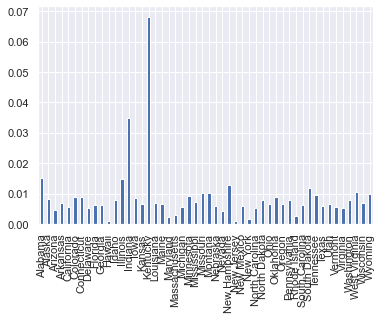

In [55]:
percapita_2016.plot(x='state', y='totals', kind='bar');

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

Overall, gun permits generally increased over the guns time period with spikes between 2012 and 2014 and again in 2016 and 2018.

According to the FBI Guns data, Kentucky accounted for the highest volume of total gun permits. When analyzed with the US Census data, Kentucky also accounted for the most per capita gun permits.


Limitations:

1) 

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!